

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [2]:
# CODE HERE
from google.colab import files
uploaded = files.upload()

Saving Frozen_Dessert_Production.csv to Frozen_Dessert_Production.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Frozen_Dessert_Production.csv']),index_col='DATE',parse_dates=True)
# Dataset is now stored in a Pandas Dataframe

In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [5]:
#CODE HERE
df.columns=['Production']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [7]:
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

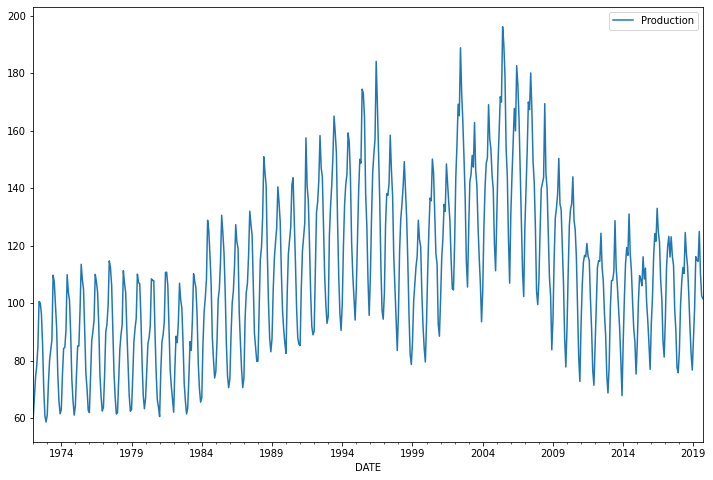

In [8]:
#CODE HERE
df.plot(figsize=(12,8))

## Train Test Split

In [9]:
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 36 months of data.**

In [10]:
#CODE HERE
test_size=36
test_ind=len(df)-test_size

In [11]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [12]:
len(test)

36

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [13]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [14]:
scaled_train=scaler.fit_transform(train)

In [15]:
scaled_test=scaler.transform(test)

In [16]:
scaled_train

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

In [17]:
scaled_test

array([[0.31068714],
       [0.20365141],
       [0.16432593],
       [0.2587782 ],
       [0.39071032],
       [0.44387077],
       [0.4695409 ],
       [0.41743926],
       [0.46851409],
       [0.41889656],
       [0.39641011],
       [0.28544533],
       [0.23134679],
       [0.13655347],
       [0.12472921],
       [0.18015997],
       [0.29691617],
       [0.35382169],
       [0.39102302],
       [0.37592272],
       [0.47940099],
       [0.42586022],
       [0.3928192 ],
       [0.32470899],
       [0.2434103 ],
       [0.17289089],
       [0.13163033],
       [0.20608099],
       [0.28689318],
       [0.41822681],
       [0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [18]:
#CODE HERE
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
length=24
n_features=1#As there is only one column we are working on
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [20]:
X,y=generator[0]

In [21]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.
 0.01774221 0.09850931 0.15590133 0.18358944 0.20878908 0.37150354
 0.3542551  0.29817568 0.23973867 0.12104304 0.05289938 0.02087498]
Predict this y: 
 [[0.03141355]]


In [22]:
scaled_train[24]

array([0.03141355])

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM/GRU units you want and a final Dense Layer.**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,RNN,GRU

In [24]:
#define the model
model=Sequential()
model.add(GRU(120,input_shape=(length,n_features),))

model.add(Dense(1))#Output layer

#Optimaztion of layer
model.compile(optimizer='adam', loss='mse')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 120)               44280     
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 44,401
Trainable params: 44,401
Non-trainable params: 0
_________________________________________________________________


**Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set**

In [26]:
# CODE HERE
valid_gen=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [29]:
model.fit(generator,epochs=10,validation_data=valid_gen,
          callbacks=[early_stop])

Epoch 1/10
513/513 [==============================] - 7s 11ms/step - loss: 0.0368 - val_loss: 0.0028
Epoch 2/10
513/513 [==============================] - 5s 10ms/step - loss: 0.0044 - val_loss: 0.0038


In [30]:
model.history.history

{'loss': [0.01720367558300495, 0.004230565391480923],
 'val_loss': [0.0027958229184150696, 0.003824223531410098]}

**TASK: Plot the history of the loss that occured during training.**

In [31]:
losses=pd.DataFrame(model.history.history)

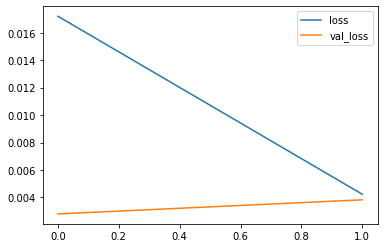

In [32]:
losses.plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [33]:
# CODE HERE
test_pred=[]

first_eval_batch=scaled_train[-length:]#Last 36 months of my training dataset
curr_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  curr_pred=model.predict(curr_batch)[0]#predicting first one and saving in curr_pred on basis of last 36 months

  #predicting and adding to the list to compare with original one
  test_pred.append(curr_pred)

  #finally update current prediction value by removing top one after it's predicted and appending it with curr_pred value
  curr_batch=np.append(curr_batch[:,1:,:],[[curr_pred]],axis=1)

In [34]:
test_pred

[array([0.33729416], dtype=float32),
 array([0.32401374], dtype=float32),
 array([0.3535629], dtype=float32),
 array([0.41549283], dtype=float32),
 array([0.49172378], dtype=float32),
 array([0.56577563], dtype=float32),
 array([0.6250505], dtype=float32),
 array([0.660652], dtype=float32),
 array([0.66708213], dtype=float32),
 array([0.6432465], dtype=float32),
 array([0.597095], dtype=float32),
 array([0.5439223], dtype=float32),
 array([0.50560886], dtype=float32),
 array([0.49906904], dtype=float32),
 array([0.5290398], dtype=float32),
 array([0.58728606], dtype=float32),
 array([0.6571901], dtype=float32),
 array([0.7236983], dtype=float32),
 array([0.7740144], dtype=float32),
 array([0.7993254], dtype=float32),
 array([0.79543394], dtype=float32),
 array([0.7630656], dtype=float32),
 array([0.71219164], dtype=float32),
 array([0.65978044], dtype=float32),
 array([0.626154], dtype=float32),
 array([0.6244235], dtype=float32),
 array([0.6554431], dtype=float32),
 array([0.7089128],

In [35]:
true_pred=scaler.inverse_transform(test_pred)

In [36]:
test['Prediction']=true_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
test

,Production,Prediction
DATE,,
2016-10-01,101.3836,105.042436
2016-11-01,86.6647,103.216193
2016-12-01,81.2569,107.279612
2017-01-01,94.2454,115.795840
2017-02-01,112.3879,126.278654
2017-03-01,119.6982,136.461814
2017-04-01,123.2282,144.612930
2017-05-01,116.0635,149.508631
2017-06-01,123.0870,150.392865


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

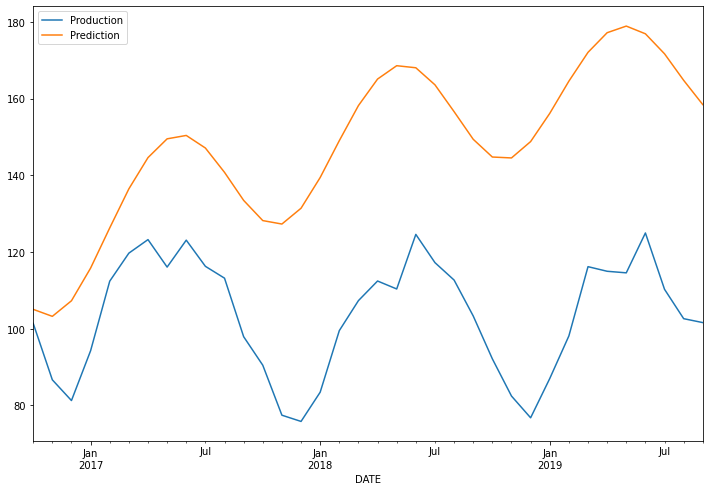

In [38]:
# CODE HERE
test.plot(figsize=(12,8))

**TASK: Calculate your RMSE.**

In [39]:
#CODE HERE
from sklearn.metrics import mean_squared_error

In [40]:
np.sqrt(mean_squared_error(test['Production'],test['Prediction']))

47.824897247038265

In [41]:
#Not good enough so change activation to 'relu' and maybe try reducing months

**TASK: Split the data into a train/test split where the test set is the last 18 months of data.**

In [42]:
#CODE HERE
test_size=15
test_ind=len(df)-test_size

In [43]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [44]:
len(test)

15

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [45]:
scaled_train=scaler.fit_transform(train)

In [46]:
scaled_test=scaler.transform(test)

## TimeSeriesGenerator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you.**

In [47]:
length=12
n_features=1#As there is only one column we are working on
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [48]:
X,y=generator[0]

In [49]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


In [50]:
scaled_train[18]

array([0.3542551])

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM/GRU units you want and a final Dense Layer.**

In [51]:
#define the model
model1=Sequential()
model1.add(GRU(110,activation='relu',input_shape=(length,n_features)))

model1.add(Dense(1))#Output layer

#Optimaztion of layer
model1.compile(optimizer='adam', loss='mse')

In [52]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 110)               37290     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 111       
Total params: 37,401
Trainable params: 37,401
Non-trainable params: 0
_________________________________________________________________


**Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set**

In [53]:
# CODE HERE
valid_gen=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [54]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [55]:
model1.fit(generator,epochs=10,validation_data=valid_gen,
          callbacks=[early_stop])

Epoch 1/10
546/546 [==============================] - 4s 5ms/step - loss: 0.0287 - val_loss: 9.2874e-04
Epoch 2/10
546/546 [==============================] - 3s 5ms/step - loss: 0.0065 - val_loss: 0.0038


In [56]:
model1.history.history

{'loss': [0.016852160915732384, 0.0056316545233130455],
 'val_loss': [0.000928737223148346, 0.003844796447083354]}

**TASK: Plot the history of the loss that occured during training.**

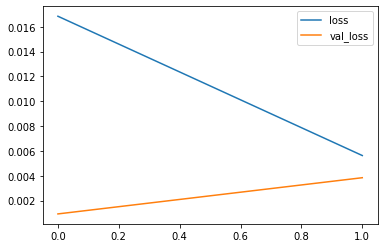

In [57]:
losses=pd.DataFrame(model1.history.history)
losses.plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [58]:
# CODE HERE
test_pred=[]

first_eval_batch=scaled_train[-length:]#Last 36 months of my training dataset
curr_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  curr_pred=model1.predict(curr_batch)[0]#predicting first one and saving in curr_pred on basis of last 36 months

  #predicting and adding to the list to compare with original one
  test_pred.append(curr_pred)

  #finally update current prediction value by removing top one after it's predicted and appending it with curr_pred value
  curr_batch=np.append(curr_batch[:,1:,:],[[curr_pred]],axis=1)

In [59]:
test_pred

[array([0.4672969], dtype=float32),
 array([0.44979477], dtype=float32),
 array([0.41563845], dtype=float32),
 array([0.37805605], dtype=float32),
 array([0.35323876], dtype=float32),
 array([0.35272473], dtype=float32),
 array([0.38155168], dtype=float32),
 array([0.4356181], dtype=float32),
 array([0.5025562], dtype=float32),
 array([0.56600237], dtype=float32),
 array([0.61235356], dtype=float32),
 array([0.63414735], dtype=float32),
 array([0.62405723], dtype=float32),
 array([0.58658683], dtype=float32),
 array([0.5342495], dtype=float32)]

In [60]:
true_pred=scaler.inverse_transform(test_pred)

In [61]:
test['Prediction']=true_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
test

,Production,Prediction
DATE,,
2018-07-01,117.2215,122.919619
2018-08-01,112.6779,120.512833
2018-09-01,103.3118,115.815864
2018-10-01,92.1321,110.647762
2018-11-01,82.4347,107.235040
2018-12-01,76.7608,107.164353
2019-01-01,86.9988,111.128460
2019-02-01,98.1116,118.563344
2019-03-01,116.1718,127.768264


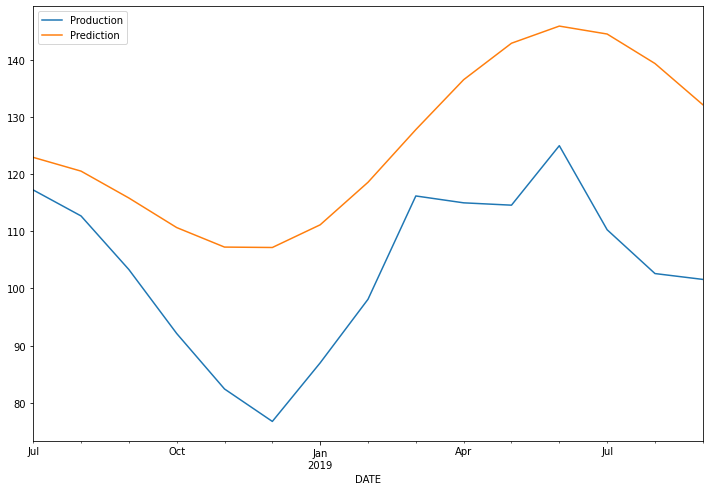

In [63]:
# CODE HERE
test.plot(figsize=(12,8))

In [64]:
np.sqrt(mean_squared_error(test['Production'],test['Prediction']))

23.692580373933776

In [65]:
#Almost the same so that means our model is neutral but better now. So, predicting next 12 months

### Retrain and Forecasting

In [66]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [67]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [68]:
model2 = Sequential()
model2.add(GRU(140, activation='relu', input_shape=(length, n_features)))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')


# fit model
model2.fit(generator,epochs=10)

Epoch 1/10
561/561 [==============================] - 4s 5ms/step - loss: 0.0376
Epoch 2/10
561/561 [==============================] - 3s 5ms/step - loss: 0.0069
Epoch 3/10
561/561 [==============================] - 3s 5ms/step - loss: 0.0043
Epoch 4/10
561/561 [==============================] - 3s 5ms/step - loss: 0.0040
Epoch 5/10
561/561 [==============================] - 3s 5ms/step - loss: 0.0036
Epoch 6/10
561/561 [==============================] - 3s 5ms/step - loss: 0.0030
Epoch 7/10
561/561 [==============================] - 3s 5ms/step - loss: 0.0031
Epoch 8/10
561/561 [==============================] - 3s 5ms/step - loss: 0.0035
Epoch 9/10
561/561 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 10/10
561/561 [==============================] - 3s 5ms/step - loss: 0.0028


In [69]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model2.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [70]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [71]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [72]:
forecast_index = pd.date_range(start='2019-10-01',periods=periods,freq='MS')

In [73]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [74]:
forecast_df

,Forecast
2019-10-01,91.323931
2019-11-01,85.845957
2019-12-01,85.360673
2020-01-01,92.051433
2020-02-01,103.516061
2020-03-01,114.401264
2020-04-01,123.439382
2020-05-01,129.386820
2020-06-01,132.827123
2020-07-01,128.673711


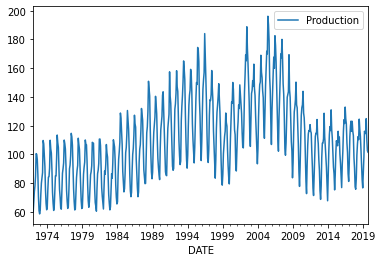

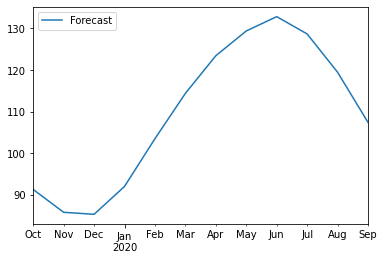

In [75]:
df.plot()
forecast_df.plot()

### Joining pandas plot

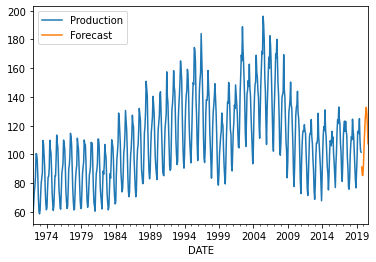

In [76]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

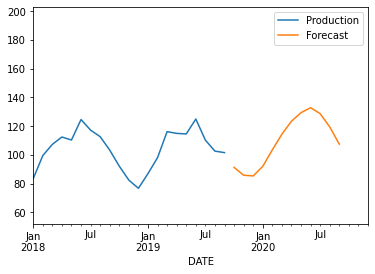

In [77]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')